In [12]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
# Example molecule: Aspirin
aspirin_smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"
molecule = Chem.MolFromSmiles(aspirin_smiles)

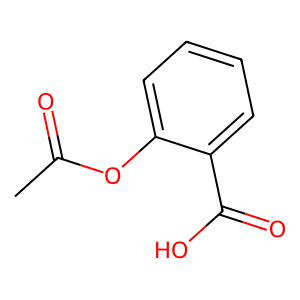

In [3]:
# Visualize the molecule
Draw.MolToImage(molecule)

In [4]:
import networkx as nx
from networkx.algorithms import isomorphism

# Create two graphs
G1 = nx.Graph()
G2 = nx.Graph()

# Add nodes and edges to the first graph
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Add nodes and edges to the second graph
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

# VF2 algorithm
GM = isomorphism.GraphMatcher(G1, G2)
print("Are G1 and G2 isomorphic?", GM.is_isomorphic())

Are G1 and G2 isomorphic? True


In [5]:
# Example of converting a molecule to a NetworkX graph
def molecule_to_nx_graph(molecule):
    G = nx.Graph()
    for atom in molecule.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in molecule.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())
    return G

# Convert the aspirin molecule to a graph
aspirin_graph = molecule_to_nx_graph(molecule)

# Now you can use the VF2 algorithm or visualize this graph with NetworkX

In [7]:
aspirin_graph = molecule_to_nx_graph(molecule)

In [10]:
aspirin_graph

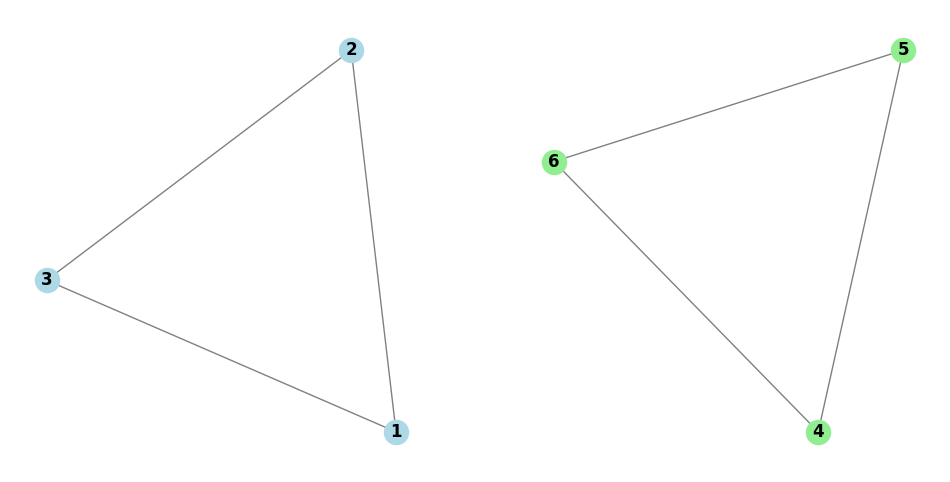

Are G1 and G2 isomorphic? True
Mapping (G1 to G2): {1: 4, 2: 5, 3: 6}


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import isomorphism

# Define the graphs
G1 = nx.Graph()
G2 = nx.Graph()

# Add nodes and edges to G1
G1.add_edges_from([(1, 2), (2, 3), (3, 1)])

# Add nodes and edges to G2
G2.add_edges_from([(4, 5), (5, 6), (6, 4)])

# Check for isomorphism and get the mapping
GM = isomorphism.GraphMatcher(G1, G2)
is_isomorphic = GM.is_isomorphic()
mapping = None if not is_isomorphic else GM.mapping

# Visualize G1
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(G1, with_labels=True, font_weight='bold', node_color='lightblue', edge_color='gray')

# Visualize G2
plt.subplot(122)
nx.draw(G2, with_labels=True, font_weight='bold', node_color='lightgreen', edge_color='gray')
plt.show()

# Print isomorphic status and mapping
print("Are G1 and G2 isomorphic?", is_isomorphic)
if is_isomorphic:
    print("Mapping (G1 to G2):", mapping)

In [14]:
mapping = None if not is_isomorphic else GM.mapping
print(mapping)

{1: 4, 2: 5, 3: 6}


In [15]:
GM = isomorphism.GraphMatcher(G1, G2)

In [16]:
GM

In [17]:
GM.mapping

{}

In [18]:
class VF2Matcher:
    def __init__(self, G1, G2):
        self.G1 = G1  # First graph
        self.G2 = G2  # Second graph
        self.core_1 = {}  # Mapping from G1 to G2
        self.core_2 = {}  # Mapping from G2 to G1

    def is_match(self):
        return self.match()

    def match(self, n=None):
        # If the mapping is complete (all nodes in G1 are matched)
        if len(self.core_1) == len(self.G1):
            return True
    
        if n is None:
            try:
                n = next(iter(set(self.G1) - set(self.core_1)))
            except StopIteration:
                return True
    
        for m in self.G2:
            if m not in self.core_2 and self.semantic_feasibility(n, m):
                self.core_1[n] = m
                self.core_2[m] = n
                # Use a list comprehension to find the next unmatched node in G1, if any
                unmatched_nodes = list(set(self.G1) - set(self.core_1))
                if not unmatched_nodes or self.match(unmatched_nodes[0]):
                    return True
                del self.core_1[n]
                del self.core_2[m]
        return False

    # def semantic_feasibility(self, n, m):
    #     # Check if nodes n and m are semantically feasible (simple example: node degree)
    #     # This can be extended based on the graph's context, e.g., node and edge labels
    #     return len(self.G1[n]) == len(self.G2[m])
    def semantic_feasibility(self, n, m):
        atom_n = self.G1[n]['atom']
        atom_m = self.G2[m]['atom']
        
        # Check if atom types match
        if atom_n != atom_m:
            return False
        
        # Check if the number of neighbors (bonds) matches
        # This simplistic check can be expanded with bond types, stereochemistry, etc.
        if len(self.G1[n]['neighbors']) != len(self.G2[m]['neighbors']):
            return False
        
        return True


In [23]:
# Define two graphs as dictionaries of sets {node: {neighbors}}
G1 = {1: {2, 3}, 2: {1, 3}, 3: {1, 2}}
G2 = {4: {5, 6}, 5: {4, 6}, 6: {4, 5}}

matcher = VF2Matcher(G1, G2)
print("Are G1 and G2 isomorphic?", matcher.is_match())


Are G1 and G2 isomorphic? True


In [1]:
def semantic_feasibility(self, n, m):
    # Check if atoms n and m are of the same type (e.g., both are carbon)
    if self.G1.nodes[n]['atom_type'] != self.G2.nodes[m]['atom_type']:
        return False

    # Check if the degree (connectivity) matches
    if len(self.G1[n]) != len(self.G2[m]):
        return False

    # Check bond types for each connecting edge
    for neighbor in self.G1[n]:
        if any(self.G1[n][neighbor]['bond_type'] != self.G2[m][m_neighbor]['bond_type'] 
               for m_neighbor in self.G2[m] if self.core_1.get(neighbor) == m_neighbor):
            return False

    # Additional checks can be added here, e.g., chirality

    return True

def check_chirality(self, n, m):
    # Assuming 'chirality' is a property stored in the node attributes
    chirality_n = self.G1.nodes[n].get('chirality')
    chirality_m = self.G2.nodes[m].get('chirality')
    return chirality_n == chirality_m or not chirality_n or not chirality_m

def check_bond_stereochemistry(self, n, m):
    # This requires checking the spatial arrangement around double bonds
    # This example assumes you have a way to determine the configuration (e.g., 'cis' or 'trans') of a bond
    for neighbor in self.G1[n]:
        if any(self.G1[n][neighbor]['stereo'] != self.G2[m][m_neighbor]['stereo']
               for m_neighbor in self.G2[m] if self.core_1.get(neighbor) == m_neighbor):
            return False
    return True

def check_isotope(self, n, m):
    isotope_n = self.G1.nodes[n].get('isotope')
    isotope_m = self.G2.nodes[m].get('isotope')
    return isotope_n == isotope_m or not isotope_n or not isotope_m


In [3]:
from rdkit import Chem

# Function to read molecules from a SMILES file
def read_molecules_from_smiles(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    molecules = [Chem.MolFromSmiles(line.split()[0]) for line in lines]
    return molecules

# Read the molecules
molecules = read_molecules_from_smiles('molecules/ethanol.smiles')

# Example: Print atom types in each molecule
for mol in molecules:
    print([atom.GetSymbol() for atom in mol.GetAtoms()])


['C', 'C', 'O']


In [4]:
molecules

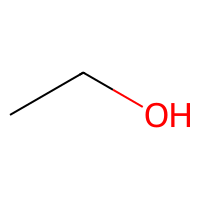

In [6]:
from rdkit import Chem
from rdkit.Chem import Draw

# SMILES strings for ethanol and methanol
ethanol_smiles = "CCO"
methanol_smiles = "CO"

# Convert SMILES to RDKit molecule objects
ethanol_molecule = Chem.MolFromSmiles(ethanol_smiles)
methanol_molecule = Chem.MolFromSmiles(methanol_smiles)

# Visualize the molecules
Draw.MolToImage(ethanol_molecule, size=(200, 200))

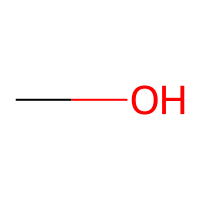

In [7]:
Draw.MolToImage(methanol_molecule, size=(200, 200))


In [8]:
# Example: Print atoms and bonds in ethanol
print("Ethanol:")
for atom in ethanol_molecule.GetAtoms():
    print(f"Atom: {atom.GetSymbol()}, Degree: {atom.GetDegree()}")

for bond in ethanol_molecule.GetBonds():
    print(f"Bond: {bond.GetBondType()} between {bond.GetBeginAtomIdx()} and {bond.GetEndAtomIdx()}")


Ethanol:
Atom: C, Degree: 1
Atom: C, Degree: 2
Atom: O, Degree: 1
Bond: SINGLE between 0 and 1
Bond: SINGLE between 1 and 2


In [5]:
def molecule_to_graph(molecule):
    graph = {}
    for atom in molecule.GetAtoms():
        graph[atom.GetIdx()] = {'atom': atom.GetSymbol(), 'neighbors': set()}
    
    for bond in molecule.GetBonds():
        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        graph[start]['neighbors'].add(end)
        graph[end]['neighbors'].add(start)
    
    return graph


In [10]:
def semantic_feasibility(self, n, m):
    atom_n = self.G1[n]['atom']
    atom_m = self.G2[m]['atom']
    
    # Check if atom types match
    if atom_n != atom_m:
        return False
    
    # Check if the number of neighbors (bonds) matches
    # This simplistic check can be expanded with bond types, stereochemistry, etc.
    if len(self.G1[n]['neighbors']) != len(self.G2[m]['neighbors']):
        return False
    
    return True


In [19]:
ethanol = Chem.MolFromSmiles("CCO")
methanol = Chem.MolFromSmiles("CO")

In [20]:
# Assuming you have defined ethanol and methanol using RDKit
ethanol_graph = molecule_to_graph(ethanol)
methanol_graph = molecule_to_graph(methanol)

matcher = VF2Matcher(ethanol_graph, methanol_graph)
match = matcher.is_match()

print("Is there a match:", match)


Is there a match: False


In [21]:
ethanol_graph

{0: {'atom': 'C', 'neighbors': {1}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'O', 'neighbors': {1}}}

In [22]:
methanol_graph

{0: {'atom': 'C', 'neighbors': {1}}, 1: {'atom': 'O', 'neighbors': {0}}}

In [23]:
class VF2Matcher:
    def __init__(self, G1, G2):
        self.G1 = G1  # First graph
        self.G2 = G2  # Second graph
        self.core_1 = {}  # Mapping from G1 to G2
        self.core_2 = {}  # Mapping from G2 to G1
        self.largest_match = {}  # Store the largest match found
    
    def is_match(self):
        self.match()
        return len(self.largest_match) > 0

    def match(self, n=None):
        # Check and update the largest match found so far
        if len(self.core_1) > len(self.largest_match):
            self.largest_match = self.core_1.copy()
        
        if len(self.core_1) == len(self.G1):
            return True
        
        if n is None:
            try:
                n = next(iter(set(self.G1.keys()) - set(self.core_1.keys())))
            except StopIteration:
                return True
        
        for m in self.G2:
            if m not in self.core_2 and self.semantic_feasibility(n, m):
                self.core_1[n] = m
                self.core_2[m] = n
                unmatched_nodes = list(set(self.G1.keys()) - set(self.core_1.keys()))
                if not unmatched_nodes or self.match(unmatched_nodes[0]):
                    return True
                # Backtrack
                del self.core_1[n]
                del self.core_2[m]
        return False

    def semantic_feasibility(self, n, m):
        # Simplified check: only consider node count match for demonstration
        return len(self.G1[n]['neighbors']) == len(self.G2[m]['neighbors'])
    
    def print_largest_match(self):
        print("Largest Common Subgraph Mapping (G1 -> G2):")
        for n in self.largest_match:
            print(f"{n} -> {self.largest_match[n]}")
        print(f"Total Nodes Matched: {len(self.largest_match)}")


In [24]:
# Assuming ethanol_graph and methanol_graph are defined as before
matcher = VF2Matcher(ethanol_graph, methanol_graph)
matcher.is_match()  # Run the matching process
matcher.print_largest_match()  # Print the largest common subgraph


Largest Common Subgraph Mapping (G1 -> G2):
0 -> 0
Total Nodes Matched: 1


In [28]:
class VF2Matcher:
    def __init__(self, G1, G2):
        self.G1 = G1  # First graph
        self.G2 = G2  # Second graph
        self.core_1 = {}  # Mapping from G1 to G2
        self.core_2 = {}  # Mapping from G2 to G1
        self.largest_match = {}  # Store the largest match found
    
    def is_match(self):
        self.match()
        return len(self.largest_match) > 0

    def match(self, n=None):
        # Check and update the largest match found so far
        if len(self.core_1) > len(self.largest_match):
            self.largest_match = self.core_1.copy()
        
        if len(self.core_1) == len(self.G1):
            return True
        
        if n is None:
            try:
                n = next(iter(set(self.G1.keys()) - set(self.core_1.keys())))
            except StopIteration:
                return True
        
        for m in self.G2:
            if m not in self.core_2 and self.semantic_feasibility(n, m):
                self.core_1[n] = m
                self.core_2[m] = n
                unmatched_nodes = list(set(self.G1.keys()) - set(self.core_1.keys()))
                if not unmatched_nodes or self.match(unmatched_nodes[0]):
                    return True
                # Backtrack
                del self.core_1[n]
                del self.core_2[m]
        return False

    def semantic_feasibility(self, n, m):
        # Simplified check: only consider node count match for demonstration
        return len(self.G1[n]['neighbors']) == len(self.G2[m]['neighbors'])
    
    def print_largest_match(self):
        # Gather matched atoms and their symbols
        matched_atoms = {self.G1[n]['atom']: self.G2[self.largest_match[n]]['atom'] for n in self.largest_match}
        print("Largest Common Subgraph Matches:")
        for n in self.largest_match:
            g1_atom_symbol = self.G1[n]['atom']
            g2_atom_symbol = self.G2[self.largest_match[n]]['atom']
            print(f"{g1_atom_symbol} (G1) -> {g2_atom_symbol} (G2)")
        print(f"Total Atoms Matched: {len(self.largest_match)}")

In [29]:
def print_matched_subgraph(matcher):
    print("Matched Subgraph:")
    for n, m in matcher.largest_match.items():
        atom_g1 = matcher.G1[n]['atom']
        atom_g2 = matcher.G2[m]['atom']
        # Assuming 'neighbors' are indices; we convert them to atom symbols
        neighbors_g1 = [matcher.G1[neighbor]['atom'] for neighbor in matcher.G1[n]['neighbors'] if neighbor in matcher.largest_match]
        neighbors_g2 = [matcher.G2[neighbor]['atom'] for neighbor in matcher.G2[m]['neighbors'] if neighbor in matcher.largest_match]
        print(f"{atom_g1} (G1) matched with {atom_g2} (G2), Neighbors in G1: {neighbors_g1}, Neighbors in G2: {neighbors_g2}")

In [35]:
def molecule_to_graph(molecule):
    graph = {}
    for atom in molecule.GetAtoms():
        graph[atom.GetIdx()] = {'atom': atom.GetSymbol(), 'neighbors': set()}
    
    for bond in molecule.GetBonds():
        start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        graph[start]['neighbors'].add(end)
        graph[end]['neighbors'].add(start)
    
    return graph

In [30]:
# Assuming ethanol_graph and methanol_graph are defined as before
matcher = VF2Matcher(ethanol_graph, methanol_graph)
matcher.is_match()  # Run the matching process
matcher.print_largest_match()  # Print the largest common subgraph


Largest Common Subgraph Matches:
C (G1) -> C (G2)
Total Atoms Matched: 1


In [31]:
print_matched_subgraph(matcher)


Matched Subgraph:
C (G1) matched with C (G2), Neighbors in G1: [], Neighbors in G2: []


In [34]:
matcher.G1[2]['atom']

'O'

In [38]:
# Assuming you have defined ethanol and methanol using RDKit
ibuprofen = Chem.MolFromSmiles("CC(C)CC1=CC=C(C=C1)C(C)C(=O)O")
ibuprofen_graph = molecule_to_graph(ibuprofen)
naproxen = Chem.MolFromSmiles("CC(C1=CC2=C(C=C1)C=C(C=C2)OC)C(=O)O")
naproxen_graph = molecule_to_graph(naproxen)

In [39]:
ibuprofen_graph

{0: {'atom': 'C', 'neighbors': {1}},
 1: {'atom': 'C', 'neighbors': {0, 2, 3}},
 2: {'atom': 'C', 'neighbors': {1}},
 3: {'atom': 'C', 'neighbors': {1, 4}},
 4: {'atom': 'C', 'neighbors': {3, 5, 9}},
 5: {'atom': 'C', 'neighbors': {4, 6}},
 6: {'atom': 'C', 'neighbors': {5, 7}},
 7: {'atom': 'C', 'neighbors': {6, 8, 10}},
 8: {'atom': 'C', 'neighbors': {7, 9}},
 9: {'atom': 'C', 'neighbors': {4, 8}},
 10: {'atom': 'C', 'neighbors': {7, 11, 12}},
 11: {'atom': 'C', 'neighbors': {10}},
 12: {'atom': 'C', 'neighbors': {10, 13, 14}},
 13: {'atom': 'O', 'neighbors': {12}},
 14: {'atom': 'O', 'neighbors': {12}}}

In [ ]:
matcher = VF2Matcher(ibuprofen_graph, naproxen_graph)
match = matcher.is_match()

print("Is there a match:", match)

In [ ]:
matcher.is_match()  # Run the matching process
matcher.print_largest_match()  # Print the largest common subgraph


In [ ]:
print_matched_subgraph(matcher)

In [40]:
ethanol_graph

{0: {'atom': 'C', 'neighbors': {1}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'O', 'neighbors': {1}}}

In [41]:
def print_matched_subgraph(matcher):
    print("Matched Subgraph:")
    for n, m in matcher.largest_match.items():
        atom_g1_symbol = matcher.G1[n]['atom']
        atom_g2_symbol = matcher.G2[m]['atom']
        print(f"{n}:{atom_g1_symbol} (Ethanol) -> {m}:{atom_g2_symbol} (Methanol)")
        
        # Print neighbors with their indices and symbols for Ethanol
        neighbors_g1 = [(neighbor, matcher.G1[neighbor]['atom']) for neighbor in matcher.G1[n]['neighbors'] if neighbor in matcher.largest_match]
        neighbors_str_g1 = ', '.join([f"{idx}:{symbol}" for idx, symbol in neighbors_g1])
        
        # Print neighbors with their indices and symbols for Methanol
        neighbors_g2 = [(neighbor, matcher.G2[neighbor]['atom']) for neighbor in matcher.G2[m]['neighbors'] if neighbor in matcher.largest_match]
        neighbors_str_g2 = ', '.join([f"{idx}:{symbol}" for idx, symbol in neighbors_g2])
        
        print(f"   Neighbors in Ethanol: {neighbors_str_g1}")
        print(f"   Neighbors in Methanol: {neighbors_str_g2}")
    print(f"Total Atoms Matched: {len(matcher.largest_match)}")


In [44]:
# Instantiate VF2Matcher with the ethanol and methanol graphs
matcher = VF2Matcher(ethanol_graph, methanol_graph)

# Run the matching process
matcher.is_match()

# Print the details of the largest match, including atom symbols and indices
print_matched_subgraph(matcher)

Matched Subgraph:
0:C (Ethanol) -> 0:C (Methanol)
   Neighbors in Ethanol: 
   Neighbors in Methanol: 
Total Atoms Matched: 1


In [43]:
def print_matched_subgraph(matcher):
    print("Matched Subgraph:")
    for n, m in matcher.largest_match.items():
        atom_g1_symbol = matcher.G1[n]['atom']
        atom_g2_symbol = matcher.G2[m]['atom']
        print(f"{n}:{atom_g1_symbol} (Ethanol) -> {m}:{atom_g2_symbol} (Methanol)")
        
        # Print neighbors with their indices and symbols for Ethanol
        neighbors_g1 = [(neighbor, matcher.G1[neighbor]['atom']) for neighbor in matcher.G1[n]['neighbors'] if neighbor in matcher.largest_match]
        neighbors_str_g1 = ', '.join([f"{idx}:{symbol}" for idx, symbol in neighbors_g1])
        
        # Print neighbors with their indices and symbols for Methanol
        neighbors_g2 = [(neighbor, matcher.G2[neighbor]['atom']) for neighbor in matcher.G2[m]['neighbors'] if neighbor in matcher.largest_match]
        neighbors_str_g2 = ', '.join([f"{idx}:{symbol}" for idx, symbol in neighbors_g2])
        
        print(f"   Neighbors in Ethanol: {neighbors_str_g1}")
        print(f"   Neighbors in Methanol: {neighbors_str_g2}")
    print(f"Total Atoms Matched: {len(matcher.largest_match)}")


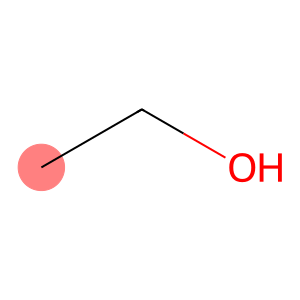

In [45]:
from rdkit import Chem
from rdkit.Chem import Draw

# Assuming 'ethanol' is your RDKit molecule object for ethanol
# and 'matcher.largest_match' contains the mapping of the largest match (e.g., {0: 0, 1: 1} for atom indices)

# Get the list of atom indices in ethanol that are part of the largest match
matched_atoms_ethanol = list(matcher.largest_match.keys())

# Highlight these atoms in the ethanol molecule
img = Draw.MolToImage(ethanol, highlightAtoms=matched_atoms_ethanol, size=(300, 300))

# For Jupyter Notebook, display the image directly
img

In [46]:
Draw.MolToFile(ethanol, 'ethanol_match.png', highlightAtoms=matched_atoms_ethanol, size=(300, 300))


In [47]:
def highlight_pharmacophore(mol, match_indices):
    """
    Highlight the pharmacophore in a molecule based on matched atom indices.
    
    Parameters:
    - mol: RDKit molecule object.
    - match_indices: List of atom indices in 'mol' that are part of the pharmacophore.
    """
    from rdkit.Chem.Draw import rdMolDraw2D
    from IPython.display import SVG
    
    # Create a drawer object and set the drawing options
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)
    drawer.drawOptions().addAtomIndices = True  # Optional: Show atom indices
    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=match_indices)
    drawer.FinishDrawing()
    
    # Display the drawing in Jupyter Notebook
    svg = drawer.GetDrawingText().replace('svg:', '')
    display(SVG(svg))


In [48]:
smiles_a = 'c1ccccc1N'  # Aniline
smiles_b = 'CCCCNC(=O)C'  # Simple amide
smiles_c = 'c1ccncc1'  # Pyridine

molecule_a = Chem.MolFromSmiles(smiles_a)
molecule_b = Chem.MolFromSmiles(smiles_b)
molecule_c = Chem.MolFromSmiles(smiles_c)

molecules = [molecule_a, molecule_b, molecule_c]

In [50]:
# Assuming 'molecule_to_graph' converts RDKit molecules to graphs suitable for VF2Matcher
graph1 = molecule_to_graph(molecule_a)
graph2 = molecule_to_graph(molecule_b)

matcher = VF2Matcher(graph1, graph2)
matcher.is_match()  # Run the matching process

# Assuming 'matcher.largest_match' gives you the mapping of matched atoms in the largest common subgraph
# Note: You'll need to adjust this to get atom indices for RDKit molecules
match_indices_1 = list(matcher.largest_match.keys())  # Atom indices in molecule1
# Convert matched indices in graph2 to the original molecule indices if necessary

highlight_pharmacophore(graph1, match_indices_1)
# Repeat for molecule2 as needed


ArgumentError: Python argument types in
    rdkit.Chem.Draw.rdMolDraw2D.PrepareAndDrawMolecule(MolDraw2DSVG, dict)
did not match C++ signature:
    PrepareAndDrawMolecule(RDKit::MolDraw2D {lvalue} drawer, RDKit::ROMol mol, std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char>> legend='', boost::python::api::object highlightAtoms=None, boost::python::api::object highlightBonds=None, boost::python::api::object highlightAtomColors=None, boost::python::api::object highlightBondColors=None, boost::python::api::object highlightAtomRadii=None, int confId=-1, bool kekulize=True)

In [2]:
from rdkit import Chem

In [6]:
smiles_a = 'c1ccccc1N'  # Aniline
smiles_b = 'CCCCNC(=O)C'  # Simple amide

molecule_a = Chem.MolFromSmiles(smiles_a)
molecule_b = Chem.MolFromSmiles(smiles_b)


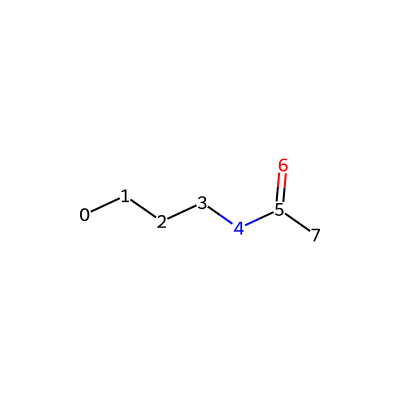

In [25]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

def highlight_match_in_molecule(smiles, match_indices):
    # Convert SMILES to a molecule object
    molecule = Chem.MolFromSmiles(smiles)

    # Create a drawer object
    drawer = rdMolDraw2D.MolDraw2DSVG(400, 400)

    # Options for drawing
    opts = drawer.drawOptions()
    opts.padding = 0.2
    
    # Loop to add annotations to the atoms
    for i, atom in enumerate(molecule.GetAtoms()):
        opts.atomLabels[i] = str(i)

    # Draw the molecule with the highlighted atoms
    drawer.DrawMolecule(molecule, highlightAtoms=match_indices)
    drawer.FinishDrawing()

    # Display the molecule
    svg = drawer.GetDrawingText().replace('svg:', '')
    display(SVG(svg))

# Define your molecule in SMILES format
smiles = 'CCCCNC(=O)C'

# Define the indices of the atoms you want to highlight (example: highlighting the nitrogen and its adjacent carbon)
match_indices = []

# Call the function with your molecule and match indices
highlight_match_in_molecule(smiles, match_indices)


In [17]:
Draw.MolToImage(molecule_a, 'Aniline.png', size=(200, 200))

TypeError: MolToImage() got multiple values for argument 'size'

In [19]:
Draw.MolToFile(molecule_a, 'Aniline.png', size=(200, 200))

In [20]:
Draw.MolToFile(molecule_b, 'simple_amide.png', size=(200, 200))

In [28]:
graph_a = molecule_to_graph(molecule_a)
graph_b = molecule_to_graph(molecule_b)


In [29]:
graph_a

{0: {'atom': 'C', 'neighbors': {1, 5}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'C', 'neighbors': {1, 3}},
 3: {'atom': 'C', 'neighbors': {2, 4}},
 4: {'atom': 'C', 'neighbors': {3, 5}},
 5: {'atom': 'C', 'neighbors': {0, 4, 6}},
 6: {'atom': 'N', 'neighbors': {5}}}

In [30]:
graph_b

{0: {'atom': 'C', 'neighbors': {1}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'C', 'neighbors': {1, 3}},
 3: {'atom': 'C', 'neighbors': {2, 4}},
 4: {'atom': 'N', 'neighbors': {3, 5}},
 5: {'atom': 'C', 'neighbors': {4, 6, 7}},
 6: {'atom': 'O', 'neighbors': {5}},
 7: {'atom': 'C', 'neighbors': {5}}}

In [31]:
matcher = VF2Matcher(graph_a, graph_b)
matcher.is_match()


NameError: name 'VF2Matcher' is not defined

In [55]:
def highlight_match_in_molecule(molecule, match_indices):
    from rdkit.Chem.Draw import MolsToGridImage
    return MolsToGridImage([molecule], highlightAtomLists=[match_indices])


In [56]:
match_indices_a = list(matcher.largest_match.keys())  # Atom indices in molecule_a


In [27]:
img_a = highlight_match_in_molecule(molecule_a, match_indices_a)
img_a

NameError: name 'match_indices_a' is not defined

In [26]:
img_a.save('AnilineOverlay.png')

NameError: name 'img_a' is not defined

In [60]:
class VF2Matcher:
    def __init__(self, G1, G2):
        self.G1 = G1  # First graph
        self.G2 = G2  # Second graph
        self.core_1 = {}  # Mapping from G1 to G2
        self.core_2 = {}  # Mapping from G2 to G1
        self.largest_match = {}  # Store the largest match found
    
    def is_match(self):
        self.match()
        return len(self.largest_match) > 0

    def match(self, n=None):
        # Check and update the largest match found so far
        if len(self.core_1) > len(self.largest_match):
            self.largest_match = self.core_1.copy()
        
        if len(self.core_1) == len(self.G1):
            return True
        
        if n is None:
            try:
                n = next(iter(set(self.G1.keys()) - set(self.core_1.keys())))
            except StopIteration:
                return True
        
        for m in self.G2:
            if m not in self.core_2 and self.semantic_feasibility(n, m):
                self.core_1[n] = m
                self.core_2[m] = n
                print(self.core_1[n], self.core_2[m])
                unmatched_nodes = list(set(self.G1.keys()) - set(self.core_1.keys()))
                print(unmatched_nodes)
                if not unmatched_nodes or self.match(unmatched_nodes[0]):
                    return True
                # Backtrack
                del self.core_1[n]
                del self.core_2[m]
        return False

    def semantic_feasibility(self, n, m):
        # Simplified check: only consider node count match for demonstration
        return len(self.G1[n]['neighbors']) == len(self.G2[m]['neighbors'])
    
    def print_largest_match(self):
        # Gather matched atoms and their symbols
        matched_atoms = {self.G1[n]['atom']: self.G2[self.largest_match[n]]['atom'] for n in self.largest_match}
        print("Largest Common Subgraph Matches:")
        for n in self.largest_match:
            g1_atom_symbol = self.G1[n]['atom']
            g2_atom_symbol = self.G2[self.largest_match[n]]['atom']
            print(f"{g1_atom_symbol} (G1) -> {g2_atom_symbol} (G2)")
        print(f"Total Atoms Matched: {len(self.largest_match)}")

In [61]:
graph1 = molecule_to_graph(molecule_a)
graph2 = molecule_to_graph(molecule_b)

matcher = VF2Matcher(graph1, graph2)
matcher.is_match()  # Run the matching process


1 0
[1, 2, 3, 4, 5, 6]
2 1
[2, 3, 4, 5, 6]
3 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 1
[2, 3, 4, 5, 6]
2 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
2 3
[4, 5, 6]
4 1
[2, 3, 4, 5, 6]
2 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 2
[3, 4, 5, 6]
2 3
[4, 5, 6]
2 0
[1, 2, 3, 4, 5, 6]
1 1
[2, 3, 4, 5, 6]
3 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 1
[2, 3, 4, 5, 6]
1 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
1 3
[4, 5, 6]
4 1
[2, 3, 4, 5, 6]
1 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 2
[3, 4, 5, 6]
1 3
[4, 5, 6]
3 0
[1, 2, 3, 4, 5, 6]
1 1
[2, 3, 4, 5, 6]
2 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
2 3
[4, 5, 6]
2 1
[2, 3, 4, 5, 6]
1 2
[3, 4, 5, 6]
4 3
[4, 5, 6]
4 2
[3, 4, 5, 6]
1 3
[4, 5, 6]
4 1
[2, 3, 4, 5, 6]
1 2
[3, 4, 5, 6]
2 3
[4, 5, 6]
2 2
[3, 4, 5, 6]
1 3
[4, 5, 6]
4 0
[1, 2, 3, 4, 5, 6]
1 1
[2, 3, 4, 5, 6]
2 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 2
[3, 4, 5, 6]
2 3
[4, 5, 6]
2 1
[2, 3, 4, 5, 6]
1 2
[3, 4, 5, 6]
3 3
[4, 5, 6]
3 2
[3, 4, 5, 6]
1 3
[4, 5, 6]
3 1
[2

True

In [62]:
graph1

{0: {'atom': 'C', 'neighbors': {1, 5}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'C', 'neighbors': {1, 3}},
 3: {'atom': 'C', 'neighbors': {2, 4}},
 4: {'atom': 'C', 'neighbors': {3, 5}},
 5: {'atom': 'C', 'neighbors': {0, 4, 6}},
 6: {'atom': 'N', 'neighbors': {5}}}

In [63]:
graph2

{0: {'atom': 'C', 'neighbors': {1}},
 1: {'atom': 'C', 'neighbors': {0, 2}},
 2: {'atom': 'C', 'neighbors': {1, 3}},
 3: {'atom': 'C', 'neighbors': {2, 4}},
 4: {'atom': 'N', 'neighbors': {3, 5}},
 5: {'atom': 'C', 'neighbors': {4, 6, 7}},
 6: {'atom': 'O', 'neighbors': {5}},
 7: {'atom': 'C', 'neighbors': {5}}}